# Linear Regression with Artificial Neural Network

## Predicting insurance medical costs

In [1]:
# Import the libraries
import pandas as pd
import numpy as np

In [2]:
raw_Data = pd.read_csv('insurance.csv')
raw_Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
raw_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
raw_Data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
# Create label encoders for categorical features
from sklearn.preprocessing import LabelEncoder

cat_cols = ['sex', 'smoker', 'region']

for var in cat_cols:
    number = LabelEncoder()
    raw_Data[var] = number.fit_transform(raw_Data[var].astype('str'))

In [9]:
raw_Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
# Create features and label
X = raw_Data.iloc[:,:-1]
y = raw_Data.iloc[:, -1]

In [22]:
# Scaling the features and label
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_Scaled = scaler.fit_transform(X)


In [23]:
# Spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=0.20)

In [24]:
print('X_train:', len(X_train))
print('y_train:',len(y_train))
print('X_test:',len(X_test))
print('y_test:',len(y_test))

X_train: 1070
y_train: 1070
X_test: 268
y_test: 268


In [35]:
# Building the linreg model
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()

# Input Layer
model.add(Dense(12, input_dim=6, activation='relu'))
# Hidden Layers
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
# Output Layer
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'accuracy'])

In [37]:
# Fit the model
history = model.fit(X_train, y_train, epochs=300, batch_size=50, verbose=1, validation_split=0.2)

Train on 856 samples, validate on 214 samples
Epoch 1/300
856/856 [==============================] - 0s 433us/step - loss: 317349795.1776 - mean_squared_error: 317349795.1776 - mean_absolute_error: 13148.4195 - acc: 0.0000e+00 - val_loss: 334491008.4486 - val_mean_squared_error: 334491008.4486 - val_mean_absolute_error: 13469.9038 - val_acc: 0.0000e+00
Epoch 2/300
856/856 [==============================] - 0s 36us/step - loss: 317344618.4673 - mean_squared_error: 317344618.4673 - mean_absolute_error: 13148.2245 - acc: 0.0000e+00 - val_loss: 334484654.0561 - val_mean_squared_error: 334484654.0561 - val_mean_absolute_error: 13469.6725 - val_acc: 0.0000e+00
Epoch 3/300
856/856 [==============================] - 0s 30us/step - loss: 317337533.9065 - mean_squared_error: 317337533.9065 - mean_absolute_error: 13147.9629 - acc: 0.0000e+00 - val_loss: 334476480.1495 - val_mean_squared_error: 334476480.1495 - val_mean_absolute_error: 13469.3767 - val_acc: 0.0000e+00
Epoch 4/300
856/856 [========

856/856 [==============================] - 0s 30us/step - loss: 305475485.3738 - mean_squared_error: 305475485.3738 - mean_absolute_error: 12735.3425 - acc: 0.0000e+00 - val_loss: 321290549.9813 - val_mean_squared_error: 321290549.9813 - val_mean_absolute_error: 13022.1184 - val_acc: 0.0000e+00
Epoch 28/300
856/856 [==============================] - 0s 29us/step - loss: 303496614.1869 - mean_squared_error: 303496614.1869 - mean_absolute_error: 12666.5137 - acc: 0.0000e+00 - val_loss: 319160418.8411 - val_mean_squared_error: 319160418.8411 - val_mean_absolute_error: 12948.9283 - val_acc: 0.0000e+00
Epoch 29/300
856/856 [==============================] - 0s 28us/step - loss: 301302260.5607 - mean_squared_error: 301302260.5607 - mean_absolute_error: 12588.2333 - acc: 0.0000e+00 - val_loss: 316769241.2710 - val_mean_squared_error: 316769241.2710 - val_mean_absolute_error: 12866.3843 - val_acc: 0.0000e+00
Epoch 30/300
856/856 [==============================] - 0s 27us/step - loss: 298820672

Epoch 54/300
856/856 [==============================] - 0s 29us/step - loss: 175342614.7243 - mean_squared_error: 175342614.7243 - mean_absolute_error: 8263.1067 - acc: 0.0000e+00 - val_loss: 185287476.2617 - val_mean_squared_error: 185287476.2617 - val_mean_absolute_error: 8738.3542 - val_acc: 0.0000e+00
Epoch 55/300
856/856 [==============================] - 0s 27us/step - loss: 169778070.5421 - mean_squared_error: 169778070.5421 - mean_absolute_error: 8122.9078 - acc: 0.0000e+00 - val_loss: 179371396.8598 - val_mean_squared_error: 179371396.8598 - val_mean_absolute_error: 8602.6568 - val_acc: 0.0000e+00
Epoch 56/300
856/856 [==============================] - 0s 27us/step - loss: 164090770.2897 - mean_squared_error: 164090770.2897 - mean_absolute_error: 7981.6917 - acc: 0.0000e+00 - val_loss: 173848866.6916 - val_mean_squared_error: 173848866.6916 - val_mean_absolute_error: 8487.8187 - val_acc: 0.0000e+00
Epoch 57/300
856/856 [==============================] - 0s 25us/step - loss: 15

Epoch 81/300
856/856 [==============================] - 0s 27us/step - loss: 108047176.1121 - mean_squared_error: 108047176.1121 - mean_absolute_error: 7765.6175 - acc: 0.0000e+00 - val_loss: 115343863.5514 - val_mean_squared_error: 115343863.5514 - val_mean_absolute_error: 8170.4069 - val_acc: 0.0000e+00
Epoch 82/300
856/856 [==============================] - 0s 27us/step - loss: 107604352.2850 - mean_squared_error: 107604352.2850 - mean_absolute_error: 7781.0745 - acc: 0.0000e+00 - val_loss: 114767514.6168 - val_mean_squared_error: 114767514.6168 - val_mean_absolute_error: 8180.7140 - val_acc: 0.0000e+00
Epoch 83/300
856/856 [==============================] - 0s 27us/step - loss: 107166249.6449 - mean_squared_error: 107166249.6449 - mean_absolute_error: 7787.8975 - acc: 0.0000e+00 - val_loss: 114303245.9813 - val_mean_squared_error: 114303245.9813 - val_mean_absolute_error: 8181.2301 - val_acc: 0.0000e+00
Epoch 84/300
856/856 [==============================] - 0s 27us/step - loss: 10

Epoch 108/300
856/856 [==============================] - ETA: 0s - loss: 73692256.0000 - mean_squared_error: 73692256.0000 - mean_absolute_error: 6387.3364 - acc: 0.0000e+0 - 0s 27us/step - loss: 97969519.1682 - mean_squared_error: 97969519.1682 - mean_absolute_error: 7636.8632 - acc: 0.0000e+00 - val_loss: 103815556.4860 - val_mean_squared_error: 103815556.4860 - val_mean_absolute_error: 7976.6358 - val_acc: 0.0000e+00
Epoch 109/300
856/856 [==============================] - 0s 30us/step - loss: 97585064.8411 - mean_squared_error: 97585064.8411 - mean_absolute_error: 7630.8268 - acc: 0.0000e+00 - val_loss: 103356493.2710 - val_mean_squared_error: 103356493.2710 - val_mean_absolute_error: 7970.8952 - val_acc: 0.0000e+00
Epoch 110/300
856/856 [==============================] - 0s 27us/step - loss: 97214215.7944 - mean_squared_error: 97214215.7944 - mean_absolute_error: 7614.4649 - acc: 0.0000e+00 - val_loss: 102960468.5607 - val_mean_squared_error: 102960468.5607 - val_mean_absolute_err

856/856 [==============================] - 0s 28us/step - loss: 88088097.1682 - mean_squared_error: 88088097.1682 - mean_absolute_error: 7250.6688 - acc: 0.0000e+00 - val_loss: 92981379.8131 - val_mean_squared_error: 92981379.8131 - val_mean_absolute_error: 7564.0508 - val_acc: 0.0000e+00
Epoch 135/300
856/856 [==============================] - 0s 29us/step - loss: 87699175.4766 - mean_squared_error: 87699175.4766 - mean_absolute_error: 7236.7252 - acc: 0.0000e+00 - val_loss: 92570804.0374 - val_mean_squared_error: 92570804.0374 - val_mean_absolute_error: 7544.6440 - val_acc: 0.0000e+00
Epoch 136/300
856/856 [==============================] - 0s 28us/step - loss: 87313043.0467 - mean_squared_error: 87313043.0467 - mean_absolute_error: 7214.1400 - acc: 0.0000e+00 - val_loss: 92161681.0093 - val_mean_squared_error: 92161681.0093 - val_mean_absolute_error: 7521.9203 - val_acc: 0.0000e+00
Epoch 137/300
856/856 [==============================] - 0s 28us/step - loss: 86888427.4299 - mean_squ

Epoch 161/300
856/856 [==============================] - 0s 28us/step - loss: 76647620.3458 - mean_squared_error: 76647620.3458 - mean_absolute_error: 6797.0666 - acc: 0.0000e+00 - val_loss: 80462585.6449 - val_mean_squared_error: 80462585.6449 - val_mean_absolute_error: 7059.4952 - val_acc: 0.0000e+00
Epoch 162/300
856/856 [==============================] - 0s 27us/step - loss: 76196095.1963 - mean_squared_error: 76196095.1963 - mean_absolute_error: 6770.3339 - acc: 0.0000e+00 - val_loss: 80035802.3925 - val_mean_squared_error: 80035802.3925 - val_mean_absolute_error: 7024.1853 - val_acc: 0.0000e+00
Epoch 163/300
856/856 [==============================] - 0s 26us/step - loss: 75730882.0187 - mean_squared_error: 75730882.0187 - mean_absolute_error: 6749.0033 - acc: 0.0000e+00 - val_loss: 79508906.2804 - val_mean_squared_error: 79508906.2804 - val_mean_absolute_error: 7010.7492 - val_acc: 0.0000e+00
Epoch 164/300
856/856 [==============================] - 0s 29us/step - loss: 75264974.1

Epoch 188/300
856/856 [==============================] - 0s 28us/step - loss: 63829921.3271 - mean_squared_error: 63829921.3271 - mean_absolute_error: 6220.0770 - acc: 0.0000e+00 - val_loss: 66537618.0935 - val_mean_squared_error: 66537618.0935 - val_mean_absolute_error: 6500.4346 - val_acc: 0.0000e+00
Epoch 189/300
856/856 [==============================] - 0s 27us/step - loss: 63300739.7757 - mean_squared_error: 63300739.7757 - mean_absolute_error: 6220.5498 - acc: 0.0000e+00 - val_loss: 65975835.2150 - val_mean_squared_error: 65975835.2150 - val_mean_absolute_error: 6489.6273 - val_acc: 0.0000e+00
Epoch 190/300
856/856 [==============================] - 0s 28us/step - loss: 62819386.7850 - mean_squared_error: 62819386.7850 - mean_absolute_error: 6195.6202 - acc: 0.0000e+00 - val_loss: 65484549.0841 - val_mean_squared_error: 65484549.0841 - val_mean_absolute_error: 6454.3464 - val_acc: 0.0000e+00
Epoch 191/300
856/856 [==============================] - 0s 28us/step - loss: 62293221.1

Epoch 215/300
856/856 [==============================] - 0s 28us/step - loss: 51021297.7383 - mean_squared_error: 51021297.7383 - mean_absolute_error: 5623.3350 - acc: 0.0000e+00 - val_loss: 52739201.9813 - val_mean_squared_error: 52739201.9813 - val_mean_absolute_error: 5893.2318 - val_acc: 0.0000e+00
Epoch 216/300
856/856 [==============================] - 0s 28us/step - loss: 50572293.0841 - mean_squared_error: 50572293.0841 - mean_absolute_error: 5620.5218 - acc: 0.0000e+00 - val_loss: 52230223.8879 - val_mean_squared_error: 52230223.8879 - val_mean_absolute_error: 5895.7719 - val_acc: 0.0000e+00
Epoch 217/300
856/856 [==============================] - 0s 28us/step - loss: 50144651.3411 - mean_squared_error: 50144651.3411 - mean_absolute_error: 5597.4606 - acc: 0.0000e+00 - val_loss: 51821423.2523 - val_mean_squared_error: 51821423.2523 - val_mean_absolute_error: 5859.7270 - val_acc: 0.0000e+00
Epoch 218/300
856/856 [==============================] - 0s 29us/step - loss: 49756589.2

Epoch 242/300
856/856 [==============================] - 0s 27us/step - loss: 41382778.3575 - mean_squared_error: 41382778.3575 - mean_absolute_error: 4925.8595 - acc: 0.0000e+00 - val_loss: 42598554.3738 - val_mean_squared_error: 42598554.3738 - val_mean_absolute_error: 5194.5419 - val_acc: 0.0000e+00
Epoch 243/300
856/856 [==============================] - 0s 27us/step - loss: 41110404.2056 - mean_squared_error: 41110404.2056 - mean_absolute_error: 4888.8460 - acc: 0.0000e+00 - val_loss: 42362251.0093 - val_mean_squared_error: 42362251.0093 - val_mean_absolute_error: 5154.3504 - val_acc: 0.0000e+00
Epoch 244/300
856/856 [==============================] - 0s 28us/step - loss: 40867897.0374 - mean_squared_error: 40867897.0374 - mean_absolute_error: 4853.6268 - acc: 0.0000e+00 - val_loss: 42087651.9626 - val_mean_squared_error: 42087651.9626 - val_mean_absolute_error: 5122.9717 - val_acc: 0.0000e+00
Epoch 245/300
856/856 [==============================] - 0s 27us/step - loss: 40612616.7

Epoch 269/300
856/856 [==============================] - 0s 26us/step - loss: 37009715.4907 - mean_squared_error: 37009715.4907 - mean_absolute_error: 4330.7597 - acc: 0.0000e+00 - val_loss: 38102130.9720 - val_mean_squared_error: 38102130.9720 - val_mean_absolute_error: 4607.3884 - val_acc: 0.0000e+00
Epoch 270/300
856/856 [==============================] - 0s 26us/step - loss: 36913353.5093 - mean_squared_error: 36913353.5093 - mean_absolute_error: 4318.5975 - acc: 0.0000e+00 - val_loss: 38036630.3738 - val_mean_squared_error: 38036630.3738 - val_mean_absolute_error: 4585.4062 - val_acc: 0.0000e+00
Epoch 271/300
856/856 [==============================] - 0s 26us/step - loss: 36846600.0532 - mean_squared_error: 36846600.0532 - mean_absolute_error: 4292.7233 - acc: 0.0000e+00 - val_loss: 37968430.0935 - val_mean_squared_error: 37968430.0935 - val_mean_absolute_error: 4561.8178 - val_acc: 0.0000e+00
Epoch 272/300
856/856 [==============================] - 0s 25us/step - loss: 36773025.5

Epoch 296/300
856/856 [==============================] - 0s 27us/step - loss: 35827623.7967 - mean_squared_error: 35827623.7967 - mean_absolute_error: 4013.0839 - acc: 0.0000e+00 - val_loss: 36990248.3364 - val_mean_squared_error: 36990248.3364 - val_mean_absolute_error: 4292.0391 - val_acc: 0.0000e+00
Epoch 297/300
856/856 [==============================] - 0s 30us/step - loss: 35795130.3762 - mean_squared_error: 35795130.3762 - mean_absolute_error: 4003.1395 - acc: 0.0000e+00 - val_loss: 36992954.5234 - val_mean_squared_error: 36992954.5234 - val_mean_absolute_error: 4274.5398 - val_acc: 0.0000e+00
Epoch 298/300
856/856 [==============================] - 0s 29us/step - loss: 35769123.5444 - mean_squared_error: 35769123.5444 - mean_absolute_error: 3995.8956 - acc: 0.0000e+00 - val_loss: 36957213.3832 - val_mean_squared_error: 36957213.3832 - val_mean_absolute_error: 4277.2100 - val_acc: 0.0000e+00
Epoch 299/300
856/856 [==============================] - 0s 28us/step - loss: 35777119.6

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_squared_error', 'mean_absolute_error', 'acc'])


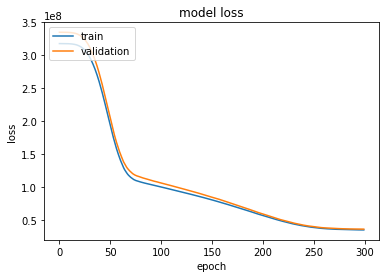

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [66]:
preds = model.predict(X_test)

In [67]:

predictions = pd.DataFrame(preds)
actual = pd.DataFrame(y_test)

In [68]:
predictions.head()

,0
0,13107.119141
1,5470.288086
2,6658.521973
3,10031.652344
4,8759.689453


In [70]:
actual.head()

,charges
702,9504.31030
174,2855.43755
519,3857.75925
537,8825.08600
1197,5699.83750
